# Overview 

The purpose of the script is to recover information about the bond charge increments of a given interatomic interaction present in a chemical structure from the charges of each atom appearing in such structure. More precisely, given a chemical structure whose atoms are enumerated, the partial atomic charge $q_{j}$ of the $j$-th atom appearing in it is calculated through the MMFF94 force field as:
\begin{equation}
q_{j} = q_{I_{j}}^{0} + \sum\limits_{k \, \, \text{bonded to} \, \, j} \omega_{I_{k},I_{j}}
\end{equation}
These values are so that:

* $I_{j}$ refers to the MMFF94 atom type of the $j$-th atom.

* $q_{I_{j}}^{0}$ is the integral or fractional formal atomic
charge associated to the atom type $I_{j}$, while $\omega_{I_{k}, I_{j}}$ refers to the bond charge increment (bci) resulting from the interaction between the bonded atoms $j$ and $k$ of types $I_{j}$ e $I_{k}$ - respectively.

* For any two given atom types $I_{j},I_{k}$, it holds that $\omega_{I_{j},I_{k}} = - \omega_{I_{k},I_{j}}$.

Thus, once we have knowledge of all the bci values for the atoms types which are present in a given structure, it is possible to obtain the atomic charges for any of its constituent atoms.

Conversely, it is natural to ask if it is possible to regenerate within a good degree of accuracy the bci values $\omega_{I_{k}, I_{j}}$ for a given enumerated structure with specified charges $q_{j}$ and $q_{I_{j}}^{0}$.

As a first insight, we notice that if we have any structure consisting of $N$ atoms:
\begin{equation}
q_{j} - q_{I_{j}}^{0} = \sum\limits_{k \, \, \text{bonded to} \, \, j} \omega_{I_{k},I_{j}}
\end{equation}
Determines a system of $N$ linear equations and $M$ unknown values, which correspond to the $M$ unique bci values appearing in the structure. Thus, our proposed problem is equivalent to finding solutions to the following linear equation
\begin{equation}
\Delta q = B \omega
\end{equation}
Where $\Delta q$ is the vector in $\mathbb{R}^{N}$ whose coordinates are specified by $q_{j} - q^{0}_{I_{j}}$, $\omega$ being the vector in $\mathbb{R}^{M}$ of unknown bci values $\omega_{I_{k}, I_{j}}$, where we convention that $k < j$ and entries are sorted by lexicographic order, as well as: 
\begin{equation}
B = (b_{rs})_{\substack{1 \leq r \leq N \\ 1 \leq s \leq M}}
\end{equation}
being the $N \times M$ matrix of coefficients for each bci $\omega_{I_{k}, I_{j}}$ obtained from connectivity information about the structure. As such, the matrix $B$ is meant to be so that for each $r$, the following equation holds:

\begin{equation}
q_{r} - q_{I_{r}}^{0} =\sum\limits_{s=1}^{M} b_{rs} \omega_{I_{j_{s}},I_{k_{s}}}
\end{equation}

We follow Halgren's previous approach and utilize a least squares method to find approximate solutions to the above-mentioned linear system of equations.

This procedure was implemented as a computer program written using Python and its libraries - NumPy, SciPy and Matplotlib - for performing the necessary data manipulation, the least squares method and data visualization - respectively.

# Dependencies

For conveniency, we let available the necessary dependencies for running this script in in the corresponding cells.

### Numpy Installation (Pip)

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Numpy Installation (Conda)

In [1]:
# Best practice, use an environment rather than install in the base env
conda create -n my-env
conda activate my-env
# If you want to install from conda-forge
conda config --env --add channels conda-forge
# The actual install command
conda install numpy

SyntaxError: invalid syntax (2928272308.py, line 2)

### SciPy

In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install scipy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda




### Matplotlib (Pip)

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Matplotlib (Conda)

In [6]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda




### Matplotlib (Conda C-Forge)

In [7]:
conda install -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda




### SciencePlots (Pip)

In [8]:
pip install SciencePlots

Note: you may need to restart the kernel to use updated packages.


### Pandas (Pip)

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
from bci_solver_mol2tools import *
from bci_solver_optimization import *
from bci_solver_visualization import *

This jupyter cell guides you through how to use the available functions in the bci solver.

Please, inform if you want to compute the bci values for a single .mol2 file by typing 1 or if you intend to compute for multiple .mol2 files present in a single folder by typing 2.2
Type the path to the folder containing the .mol2 files: 

C:\Users\Luciano\Documents\GitHub\bci_solver\test-files\fragments-Chelpg-level-MMFF94\mol2\fragment-PtNH34
Are the charges that are going to be used for the calculations present in the .mol2 files themselves (1) or in an external folder (2)?: 

2
Currently, the files accepted as charge input must be of either of the following formats: Orca's .log files, .xyz files or excel sheets. Type "log" if the charges are available in a .log file, "xyz" their format is .xyz or "sheet" if they are available in an excel sheet: 

xyz
Inform the path to the folder where the charges are available. Make sure that the folder containing the .mol2 files and the folder containing 

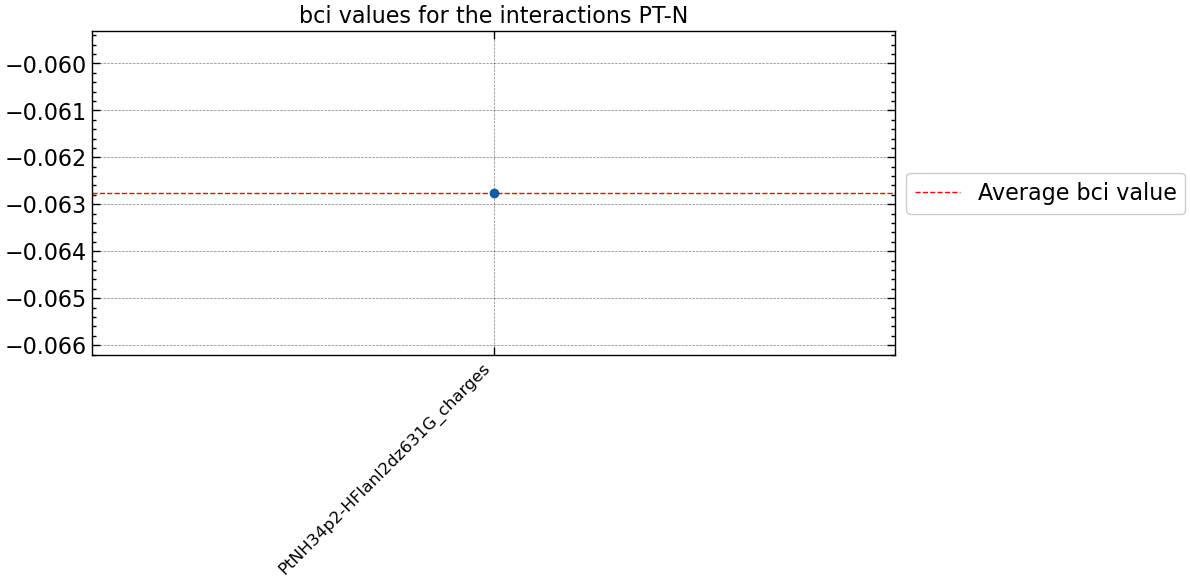

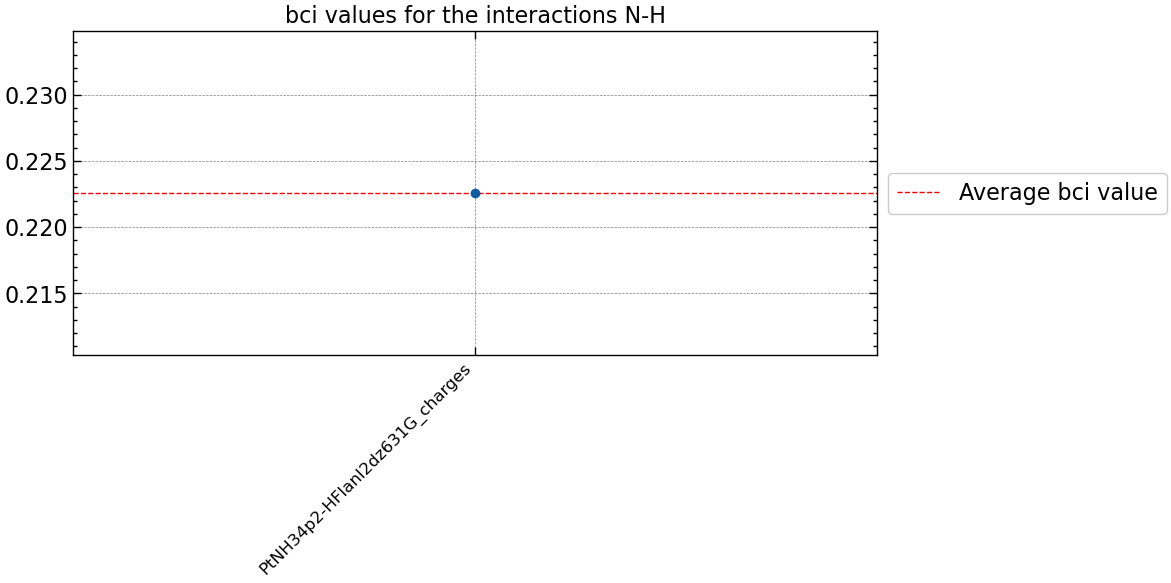

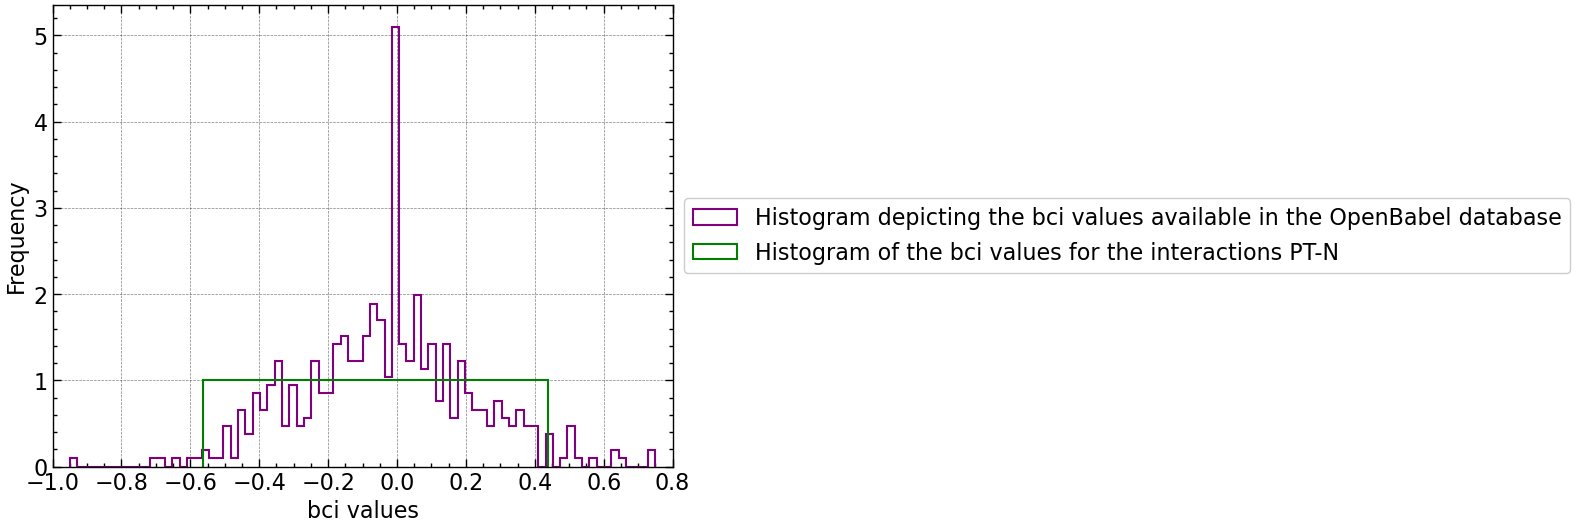

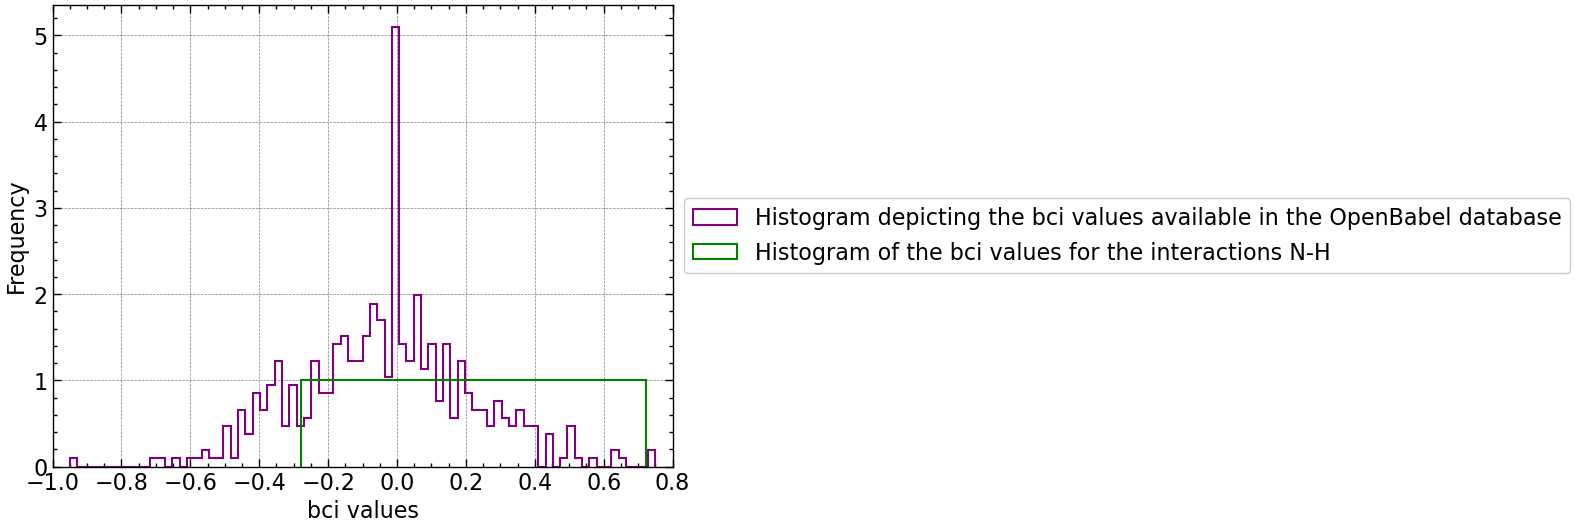

In [2]:
folder_or_single = int(input('''This jupyter cell guides you through how to use the available functions in the bci solver.

Please, inform if you want to compute the bci values for a single .mol2 file by typing 1 or if you intend to compute for multiple .mol2 files present in a single folder by typing 2.'''))

while folder_or_single !=1 and folder_or_single !=2:
    folder_or_single = int(input('''Please, inform if you want to compute the bci values for a single .mol2 file by typing 1 or if you intend to compute for multiple .mol2 files present in a single folder by typing 2. \n'''))

if folder_or_single == 1:
    mol2_file_path = input('''Type the path to the .mol2 file: \n\n''')
    charges_question = int(input('''Are the charges needed for the computation available in the file itself (1) or in a external file (2)?: \n\n'''))
    if charges_question == 2:
        charges_format = input('''Currently, the files accepted as charge input must be of either of the following formats: Orca's .log files, .xyz files or excel sheets. Type "log" if the charges are available in a .log file, "xyz" their format is .xyz or "sheet" if they are available in an excel sheet: \n\n''')
        charges_file_path = input('''Finally, inform the path to the file (including its extension) where the charges are located: \n\n''')
        if charges_format.lower() == 'log':
            mol2_file_path = charges_log2mol2(mol2_file_path,charges_file_path)
        if charges_format.lower() == 'xyz':
            mol2_file_path = charges2mol2(mol2_file_path,charges_file_path)
        if charges_format.lower() == 'sheet':
            mol2_file_path = dataframe2mol2(mol2_file_path,charges_file_path)
    bci_solver_mol2(mol2_file_path)
    
else:
    mol2_folder_path = input('''Type the path to the folder containing the .mol2 files: \n\n''')
    charges_question = int(input('''Are the charges that are going to be used for the calculations present in the .mol2 files themselves (1) or in an external folder (2)?: \n\n'''))
    if charges_question == 2:
        charges_format = input('''Currently, the files accepted as charge input must be of either of the following formats: Orca's .log files, .xyz files or excel sheets. Type "log" if the charges are available in a .log file, "xyz" their format is .xyz or "sheet" if they are available in an excel sheet: \n\n''')
        if charges_format.lower() == 'log':
            charges_folder_path = input('''Inform the path to the folder where the charges are available. Make sure that the folder containing the .mol2 files and the folder containing the charges are ordered so that the i-th .mol2 file has charges corresponding to the i-th file contained in the folder where the charges are available: \n\n''')
            mol2_folder_path = charges_log2mol2_folder(mol2_folder_path,charges_folder_path)
        if charges_format.lower() == 'xyz':
            charges_folder_path = input('''Inform the path to the folder where the charges are available. Make sure that the folder containing the .mol2 files and the folder containing the charges are ordered so that the i-th .mol2 file has charges corresponding to the i-th file contained in the folder where the charges are available: \n\n''')
            mol2_folder_path = charges2mol2_folder(mol2_folder_path,charges_folder_path)
        if charges_format.lower() == 'sheet':
            charges_folder_path = input('''Inform the path to the folder where the charges are available. Make sure that the folder containing the .mol2 files and the folder containing the charges are ordered so that the i-th .mol2 file has charges corresponding to the i-th file contained in the folder where the charges are available: \n\n''')
            mol2_folder_path = dataframe2mol2_folder(mol2_folder_path,charges_dataframe)
    bci_solver_mol2_folder(mol2_folder_path)
    bci_solver_visualizer(mol2_folder_path,full_name = True)
    bci_solver_hist_visualizer(mol2_folder_path,full_name = True)

print(r'The files were generated and are available in the folder \Computational Chemistry\bci_solver\Output')